In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_parquet('data/train.parquet')
train_df

,timestamp,station_id,temperature,humidity,wind
0,2000-04-01 00:00:00,1,14.520706,69.998333,4.046831
1,2000-04-01 01:00:00,1,15.911492,69.998333,4.046831
2,2000-04-01 02:00:00,1,13.301754,69.998333,4.046831
3,2000-04-01 03:00:00,1,14.365540,69.998333,4.046831
4,2000-04-01 04:00:00,1,13.145509,69.998333,4.046831
...,...,...,...,...,...
6255979,2024-05-31 19:00:00,31,24.302536,60.024836,4.999833
6255980,2024-05-31 20:00:00,31,22.693778,60.024836,4.999833
6255981,2024-05-31 21:00:00,31,25.320728,60.024836,4.999833
6255982,2024-05-31 22:00:00,31,24.480543,60.024836,4.999833


In [4]:
train_df['date'] = train_df['timestamp'].dt.date

In [5]:
train_df = train_df[~train_df['temperature'].isin([-10, 80])]

In [6]:
tm = train_df.groupby('date')['temperature'].median()

In [7]:
dots_y, dots_x = [], []
for i in tqdm.tqdm(train_df.index):
    if abs(train_df['temperature'][i] - tm[train_df['date'][i]]) >= 15:
        train_df['temperature'][i] = (train_df['temperature'][i] - 32) / 1.8

100%|██████████| 6240476/6240476 [00:52<00:00, 119045.54it/s]


In [8]:
train_df = pd.concat([
    train_df.groupby(['date', 'station_id'])['temperature'].min(), 
    train_df.groupby(['date', 'station_id'])['temperature'].max(), 
    train_df.groupby(['date', 'station_id'])['humidity'].mean(), 
    train_df.groupby(['date', 'station_id'])['wind'].mean()
], axis=1).reset_index()

In [9]:
train_df.columns = ['date', 'station_id', 'temperature_min', 'temperature_max', 'humidity', 'wind']
train_df['date'] = pd.to_datetime(train_df['date'])

In [10]:
train_df

,date,station_id,temperature_min,temperature_max,humidity,wind
0,1999-01-27,22,4.998328,14.774311,58.964587,1.923990
1,1999-01-28,22,4.457400,16.035507,59.271005,1.953169
2,1999-01-29,22,5.856316,16.179411,59.574677,1.982658
3,1999-01-30,22,2.256789,16.912254,59.875511,2.012449
4,1999-01-31,22,6.570539,15.332858,60.173419,2.042532
...,...,...,...,...,...,...
260661,2024-05-31,27,22.173200,30.060805,60.024836,4.999833
260662,2024-05-31,28,21.557540,37.542450,60.024836,4.999833
260663,2024-05-31,29,24.021110,34.969664,60.024836,4.999833
260664,2024-05-31,30,25.075439,37.585843,60.024836,4.999833


In [11]:
test_df = pd.read_csv('data/test.csv')
test_df

,ID,station_id,timestamp,measure_type
0,0,1,2024-06-01 00:00:00,max
1,1,1,2024-06-01 00:00:00,min
2,2,1,2024-06-02 00:00:00,max
3,3,1,2024-06-02 00:00:00,min
4,4,1,2024-06-03 00:00:00,max
...,...,...,...,...
5699,5699,31,2024-08-29 00:00:00,min
5700,5700,31,2024-08-30 00:00:00,max
5701,5701,31,2024-08-30 00:00:00,min
5702,5702,31,2024-08-31 00:00:00,max


In [12]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission

,ID,temperature
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
5699,5699,0.0
5700,5700,0.0
5701,5701,0.0
5702,5702,0.0


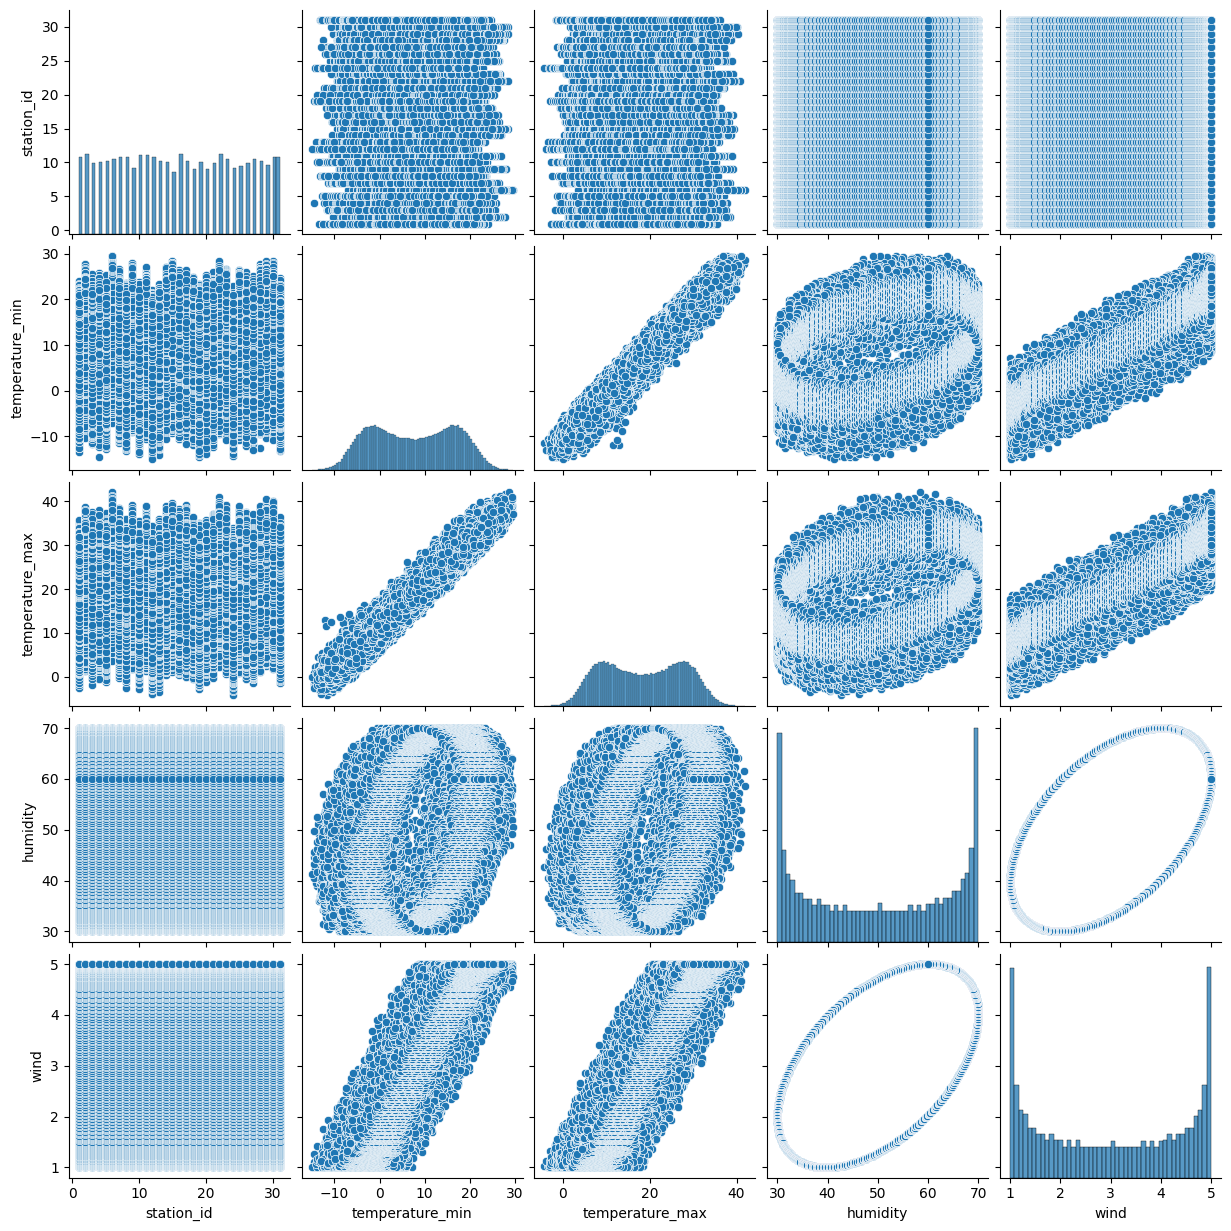

In [13]:
sns.pairplot(train_df)

In [14]:
a = train_df[(train_df['humidity'] - 70).abs() < 0.0005]['date'].unique()
a

<DatetimeArray>
['1999-04-01 00:00:00', '2000-03-31 00:00:00', '2001-04-01 00:00:00',
 '2002-04-01 00:00:00', '2003-04-01 00:00:00', '2004-03-31 00:00:00',
 '2005-04-01 00:00:00', '2006-04-01 00:00:00', '2007-04-01 00:00:00',
 '2008-03-31 00:00:00', '2009-04-01 00:00:00', '2010-04-01 00:00:00',
 '2011-04-01 00:00:00', '2012-03-31 00:00:00', '2013-04-01 00:00:00',
 '2014-04-01 00:00:00', '2015-04-01 00:00:00', '2016-03-31 00:00:00',
 '2017-04-01 00:00:00', '2018-04-01 00:00:00', '2019-04-01 00:00:00',
 '2020-03-31 00:00:00', '2021-04-01 00:00:00', '2022-04-01 00:00:00',
 '2023-04-01 00:00:00', '2024-03-31 00:00:00']
Length: 26, dtype: datetime64[ns]

In [15]:
train_df['day'] = train_df['date'].dt.day
train_df['month'] = train_df['date'].dt.month

In [16]:
train_df.groupby(['day', 'month'])[['humidity', 'wind']].std().max() / train_df[['humidity', 'wind']].mean()

humidity    0.002920
wind        0.005087
dtype: float64

In [17]:
hw = train_df.groupby(['day', 'month'])[['humidity', 'wind']].mean().reset_index()
hw

,day,month,humidity,wind
0,1,1,50.344267,1.300366
1,1,2,60.468312,2.072899
2,1,3,67.221927,3.009238
3,1,4,69.999414,4.025314
4,1,5,67.388184,4.739438
...,...,...,...,...
361,31,5,60.241663,4.999942
362,31,7,40.203852,3.995414
363,31,8,32.696712,2.974658
364,31,10,32.692079,1.252650


In [18]:
test_df

,ID,station_id,timestamp,measure_type
0,0,1,2024-06-01 00:00:00,max
1,1,1,2024-06-01 00:00:00,min
2,2,1,2024-06-02 00:00:00,max
3,3,1,2024-06-02 00:00:00,min
4,4,1,2024-06-03 00:00:00,max
...,...,...,...,...
5699,5699,31,2024-08-29 00:00:00,min
5700,5700,31,2024-08-30 00:00:00,max
5701,5701,31,2024-08-30 00:00:00,min
5702,5702,31,2024-08-31 00:00:00,max


In [19]:
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['day'] = test_df['timestamp'].dt.day
test_df['month'] = test_df['timestamp'].dt.month

In [20]:
test_wind = []
test_humidity = []
for i in test_df.index:
    test_wind.append(hw[(hw['day'] == test_df['day'][i]) & (hw['month'] == test_df['month'][i])]['wind'].iloc[0])
    test_humidity.append(hw[(hw['day'] == test_df['day'][i]) & (hw['month'] == test_df['month'][i])]['humidity'].iloc[0])
test_df['wind'] = test_wind
test_df['humidity'] = test_humidity

In [21]:
test_df

,ID,station_id,timestamp,measure_type,day,month,wind,humidity
0,0,1,2024-06-01,max,1,6,4.999658,59.954167
1,1,1,2024-06-01,min,1,6,4.999658,59.954167
2,2,1,2024-06-02,max,2,6,4.998778,59.654104
3,3,1,2024-06-02,min,2,6,4.998778,59.654104
4,4,1,2024-06-03,max,3,6,4.997305,59.351181
...,...,...,...,...,...,...,...,...
5699,5699,31,2024-08-29,min,29,8,3.043558,33.052428
5700,5700,31,2024-08-30,max,30,8,3.009122,32.872095
5701,5701,31,2024-08-30,min,30,8,3.009122,32.872095
5702,5702,31,2024-08-31,max,31,8,2.974658,32.696712


<Axes: xlabel='wind', ylabel='temperature_min'>

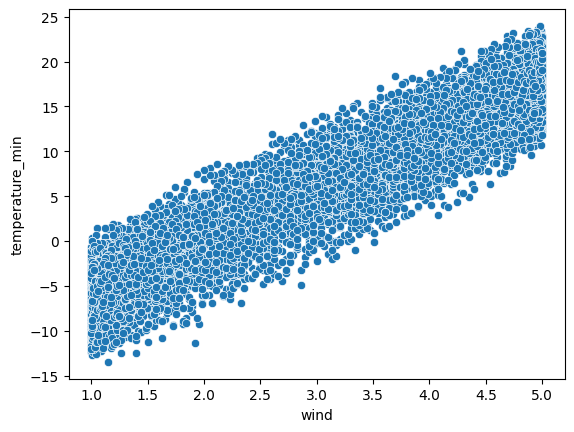

In [22]:
sns.scatterplot(x=train_df[train_df['station_id'] == 1]['wind'], y=train_df[train_df['station_id'] == 1]['temperature_min'])

<Axes: xlabel='wind', ylabel='temperature_max'>

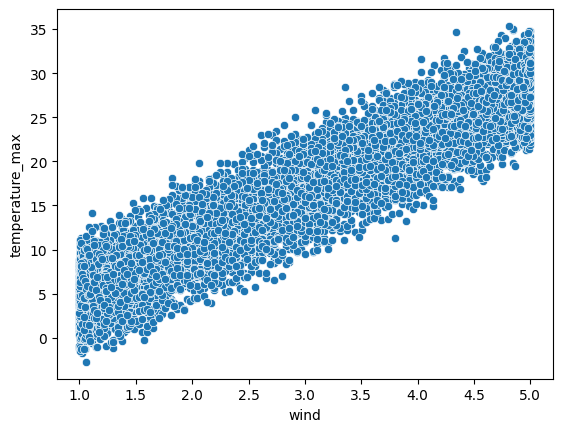

In [23]:
sns.scatterplot(x=train_df[train_df['station_id'] == 10]['wind'], y=train_df[train_df['station_id'] == 10]['temperature_max'])

<Axes: xlabel='date', ylabel='temperature_max'>

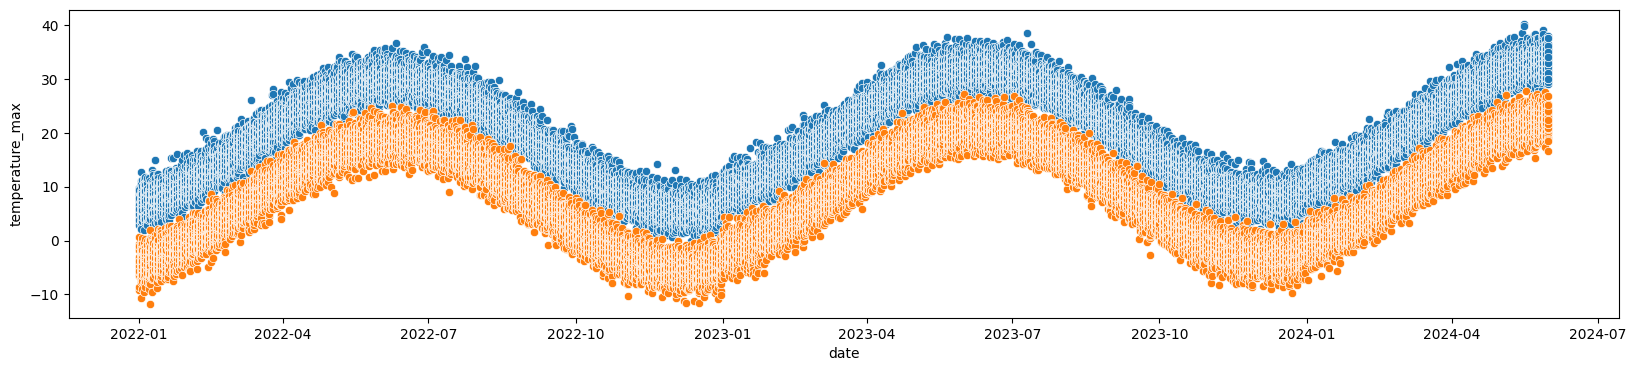

In [186]:
plt.figure(figsize=(20, 4))
sns.scatterplot(x=train_df[train_df['year'] >= 2022]['date'], y=train_df[train_df['year'] >= 2022]['temperature_max'])
sns.scatterplot(x=train_df[train_df['year'] >= 2022]['date'], y=train_df[train_df['year'] >= 2022]['temperature_min'])

<Axes: xlabel='humidity', ylabel='temperature_max'>

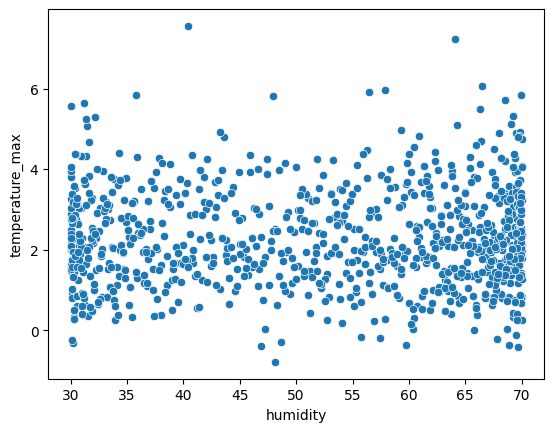

In [214]:
sns.scatterplot(x=train_df[(train_df['year'] >= 2022) & (train_df['station_id'] == 30)]['humidity'], y=train_df[(train_df['year'] >= 2022) & (train_df['station_id'] == 30)]['temperature_max'] - train_df[train_df['year'] >= 2022].groupby('date')['temperature_max'].transform('mean'))

In [245]:
train_df.groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].std().mean()

temperature_min    2.603999
temperature_max    2.605574
dtype: float64

In [26]:
train_df['year'] = train_df['date'].dt.year

In [247]:
def compare_years(y1, y2):
    temps = train_df[train_df['year'] == y1].groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].mean().reset_index()
    temps_2 = train_df[train_df['year'] == y2].groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].mean().reset_index()
    mae = []
    for i in tqdm.tqdm(temps.index):
        rl = temps_2[(temps_2['day'] == temps['day'][i]) & (temps_2['month'] == temps['month'][i]) & (temps_2['station_id'] == temps['station_id'][i])]
        if len(rl) == 1:
            mae.append(abs(temps['temperature_min'][i] - rl['temperature_min'].iloc[0]))
    return np.mean(mae)

In [307]:
r = []
for i in range(2000, 2023):
    r.append([i, compare_years(2024, i)])

  0%|          | 0/4712 [00:00<?, ?it/s]

100%|██████████| 4712/4712 [00:01<00:00, 3844.89it/s]


In [308]:
r = sorted(r, key=lambda x: x[1])
r

[[2005, 1.3160815175381255],
 [2001, 1.4292683228557956],
 [2002, 1.538475184130653],
 [2019, 1.587480946728624],
 [2021, 1.5988068739264645],
 [2000, 2.0035597560842136],
 [2006, 2.0266551768625436],
 [2020, 2.149530237815363],
 [2016, 2.1951505839606233],
 [2008, 2.834562179740781],
 [2003, 2.980538178861322],
 [2004, 3.152723907210114],
 [2011, 3.78189747248894],
 [2022, 3.800624802056406],
 [2017, 4.27752318896129],
 [2014, 4.476486326772982],
 [2007, 4.557130298545722],
 [2018, 4.972369205799789],
 [2015, 5.0697876622264975],
 [2009, 5.1963689329543135],
 [2010, 5.500573516240813],
 [2013, 7.066121968378742],
 [2012, 7.681394557907987]]

In [309]:
temps = train_df[train_df['year'] == 2023].groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].mean().reset_index()
temps

,day,month,station_id,temperature_min,temperature_max
0,1,1,1,-4.025968,7.143584
1,1,1,2,-0.198936,10.126641
2,1,1,3,-1.471663,7.563323
3,1,1,4,-0.154055,7.839639
4,1,1,5,-3.502300,8.449046
...,...,...,...,...,...
11273,31,12,27,-3.136705,7.828595
11274,31,12,28,-0.793648,11.660628
11275,31,12,29,-1.653804,9.864676
11276,31,12,30,0.229906,10.052185


In [310]:
temps_2 = train_df[train_df['year'] == 2022].groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].mean().reset_index()

In [311]:
for i in tqdm.tqdm(temps.index):
    rl = temps_2[(temps_2['day'] == temps['day'][i]) & (temps_2['month'] == temps['month'][i]) & (temps_2['station_id'] == temps['station_id'][i])]
    if len(rl) == 1:
        temps['temperature_min'][i] += 0.25 * (temps['temperature_min'][i] - rl['temperature_min'].iloc[0])
        temps['temperature_max'][i] += 0.25 * (temps['temperature_max'][i] - rl['temperature_max'].iloc[0])

100%|██████████| 11278/11278 [00:06<00:00, 1776.67it/s]


In [312]:
n_to_blend = 10
weights = np.array([1.0] + [1 / (i + 1) for i in range(n_to_blend + 1)])

for j in range(n_to_blend):
    temps_2 = train_df[train_df['year'] == r[j][0]].groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].mean().reset_index()

    for i in tqdm.tqdm(temps.index):
        rl = temps_2[(temps_2['day'] == temps['day'][i]) & (temps_2['month'] == temps['month'][i]) & (temps_2['station_id'] == temps['station_id'][i])]
        if len(rl) == 1:
            w1 = weights[:j + 1].sum()
            w2 = weights[j + 1]
            temps['temperature_min'][i] = (temps['temperature_min'][i] * w1 + rl['temperature_min'].iloc[0] * w2) / (w1 + w2)
            temps['temperature_max'][i] = (temps['temperature_max'][i] * w1 + rl['temperature_max'].iloc[0] * w2) / (w1 + w2)

100%|██████████| 11278/11278 [00:06<00:00, 1784.38it/s]


In [ ]:
# temps_2 = train_df[train_df['year'] == 2005].groupby(['day', 'month', 'station_id'])[['temperature_min', 'temperature_max']].mean().reset_index()

In [278]:
# for i in tqdm.tqdm(temps.index):
#     rl = temps_2[(temps_2['day'] == temps['day'][i]) & (temps_2['month'] == temps['month'][i]) & (temps_2['station_id'] == temps['station_id'][i])]
#     if len(rl) == 1:
#         temps['temperature_min'][i] = (temps['temperature_min'][i] * 0.4 + rl['temperature_min'].iloc[0] * 0.6) / (0.4 + 0.6)
#         temps['temperature_max'][i] = (temps['temperature_max'][i] * 0.4 + rl['temperature_max'].iloc[0] * 0.6) / (0.4 + 0.6)

In [313]:
for i in tqdm.tqdm(test_df.index):
    if test_df['measure_type'][i] == 'max':
        sample_submission['temperature'][i] = temps[(temps['day'] == test_df['day'][i]) & (temps['month'] == test_df['month'][i]) & (temps['station_id'] == test_df['station_id'][i])]['temperature_max'].iloc[0]
    elif test_df['measure_type'][i] == 'min':
        sample_submission['temperature'][i] = temps[(temps['day'] == test_df['day'][i]) & (temps['month'] == test_df['month'][i]) & (temps['station_id'] == test_df['station_id'][i])]['temperature_min'].iloc[0]

100%|██████████| 5704/5704 [00:02<00:00, 2666.92it/s]


In [314]:
sample_submission.to_csv('submission.csv', index=False)